In [6]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SQLContext
sc=pyspark.SparkContext()

In [107]:
sqlcontxt=SQLContext(sc)
df=sqlcontxt.read.json('census_datas/census_2010.json')
type(df)

pyspark.sql.dataframe.DataFrame

In [108]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [109]:
df.show(5)

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
+---+-------+-------+-------+----+
only showing top 5 rows



Notice the difference between head,collect and take  and show in Spark Data Frames

In [110]:
print(df.head(2))
print("Line ends")
print(df.take(5))
print("Line ends")
print(df.collect()[5:10])



[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010), Row(age=1, females=1997991, males=2087350, total=4085341, year=2010)]
Line ends
[Row(age=0, females=1994141, males=2085528, total=4079669, year=2010), Row(age=1, females=1997991, males=2087350, total=4085341, year=2010), Row(age=2, females=2000746, males=2088549, total=4089295, year=2010), Row(age=3, females=2002756, males=2089465, total=4092221, year=2010), Row(age=4, females=2004366, males=2090436, total=4094802, year=2010)]
Line ends
[Row(age=5, females=2005925, males=2091803, total=4097728, year=2010), Row(age=6, females=2007781, males=2093905, total=4101686, year=2010), Row(age=7, females=2010281, males=2097080, total=4107361, year=2010), Row(age=8, females=2013771, males=2101670, total=4115441, year=2010), Row(age=9, females=2018603, males=2108014, total=4126617, year=2010)]


In [111]:
##Selecting columns in a Spark Df
df[['age', 'males','females']].show(5)

+---+-------+-------+
|age|  males|females|
+---+-------+-------+
|  0|2085528|1994141|
|  1|2087350|1997991|
|  2|2088549|2000746|
|  3|2089465|2002756|
|  4|2090436|2004366|
+---+-------+-------+
only showing top 5 rows



In [112]:
## Filtering the data 

five_plus=df[df['age']>5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



Find all of the rows where females is less than males

In [113]:
more_males=df[df['males']>df['females']]
more_males.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [114]:
## Converting a spark dataframe to pandas df
pandas_df=df.toPandas()

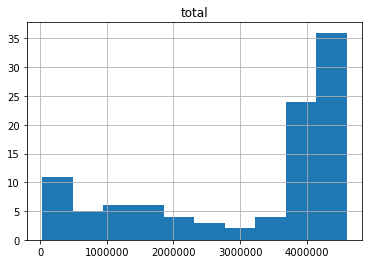

In [115]:
import matplotlib.pyplot as plt
pandas_df.hist('total')
plt.show()

**Spark SQL starts from here**

In [116]:
df.registerTempTable('census2010')
tables=sqlcontxt.tableNames()
print(tables)

['census2010']


In [117]:
## Selecting age from Sql table census2010

sqlcontxt.sql('Select age from census2010').show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [118]:
####rite and run a SQL query that returns:
###The males and females columns (in that order) where age > 5 and age < 15
df2=sqlcontxt.sql('Select males,females from census2010 where age>5 and age<15')
df2.show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



5: Mixing Functionality

Because the results of SQL queries are DataFrame objects, we can combine the best aspects of both DataFrames and SQL to enhance our workflow. For example, we can write a SQL query that quickly returns a subset of our data as a DataFrame.

Write a SQL query that returns a DataFrame containing the males and females columns from the census2010 table.

Use the describe() method to calculate summary statistics for the DataFrame and the show() method to display the results.

In [106]:
query='Select males,females from census2010'
df=sqlcontxt.sql(query)
df.describe().show()

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



In [121]:
### Reading different year census datas
df_1980=sqlcontxt.read.json('census_datas/census_1980.json')
df_1990=sqlcontxt.read.json('census_datas/census_1990.json')
df_2000=sqlcontxt.read.json('census_datas/census_2000.json')
df_1980.registerTempTable('census1980')
df_1990.registerTempTable('census1990')
df_2000.registerTempTable('census2000')

In [123]:
tables=sqlcontxt.tableNames()
tables

['census1980', 'census1990', 'census2000', 'census2010']

7: Joins

Now that we have a table for each dataset, we can write join queries to compare values across them. Since we're working with Census 

Write a query that returns a DataFrame with the total columns for the tables census2010 and census2000 (in that order).

Then, run the query and use the show() method to display the first 20 results.



In [130]:
query='Select census2010.total,census2000.total from census2010 Inner Join census2000 on census2010.age=census2000.age'
df_join=sqlcontxt.sql(query).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



In [131]:
query='Select sum(census2010.total),sum(census2000.total),sum(census1990.total) from census2010 Inner Join census2000 on census2010.age=census2000.age Inner Join census1990 on census2010.age=census1990.age'
df_join=sqlcontxt.sql(query).show()




+----------+----------+----------+
|sum(total)|sum(total)|sum(total)|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

